Проект предполагал использование различных библиотек Python для веб-скраппинга и парсинга данных с Википедии и Яндекс Погоды (с помощью API Яндекс.Погоды). После этого был проведен их анализ и визуализация.

Использованные библиотеки:
- Pandas для работы с датасетами
- BeautifulSoup и Requests для сбора данных
- Matplotlib и plotly.express для визуализации результатов

Выбери свой вариант из таблички курса и работай дальше с ним.


Вариант А. Сорта подсолнечника по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B4%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B8%D0%BA

(Таблица связи сортов подсолнечника и регионов допуска).


Вариант B. Сорта картофеля по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%80%D1%82%D0%BE%D1%84%D0%B5%D0%BB%D0%B5%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE

(Таблица связи сортов картофеля и регионов допуска)

Вариант C. Производство сахарной свёклы по миру.

https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D1%81%D0%B2%D1%91%D0%BA%D0%BB%D0%B0

(Как географические координаты можно брать столицы стран).

Вариант D. Производство зелёного гороха по странам и годам.

https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D1%85


Вариант E. Крупнейшие производители сои (тысяч тонн).

https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%8F

Вариант F. Ведущие производители кукурузы (тысяч тонн)

https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%BA%D1%83%D1%80%D1%83%D0%B7%D0%B0

Вариант G. Список стран по производству риса

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B8%D1%81%D0%B0

Вариант H. Крупнейшие производители томатов в тысячах тонн

https://ru.wikipedia.org/wiki/%D0%A2%D0%BE%D0%BC%D0%B0%D1%82

Вариант I. Список стран по выращиванию ячменя

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%B2%D1%8B%D1%80%D0%B0%D1%89%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_%D1%8F%D1%87%D0%BC%D0%B5%D0%BD%D1%8F

Вариант J. Список стран по производству ржи

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B6%D0%B8

# Часть 1. Скачай данные из табличек + информацию о географических данных (широта и долгота) + подчисти датасет. 3 балла.

In [ ]:
# Данные из нужной таблицы
from bs4 import BeautifulSoup
from requests.compat import urljoin, quote_plus, urlparse, unquote
import requests
import pandas as pd

html = requests.get('https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%8F').content.decode('utf-8') # Получаем html
soup = BeautifulSoup(html, 'html.parser') # Создаем объект BeautifulSoup
tables = soup.find_all('table')

header_needed = 'производители сои'
table_needed = None

for table in tables:
  if header_needed in table.text:
    table_needed = table
    break
# Ищем нужную таблицу

headers = []
items = []

for header in table_needed.find_all('th'):
    headers.append(header.text.strip())
# Берем все заголовки из нее

for line in table_needed.find_all('tr'):
    cells = line.find_all('td')
    row = []
    for cell in cells:
       row.append(cell.text.strip())
    if row:
       items.append(row)
# Берем все данные из нее

df = pd.DataFrame(items)
df.columns = headers[1:]
df.set_index('Страна', inplace=True)
df.index.name = None
# Создали датафрейм

display(df)

,1985,1995,2000,2005,2010,2014,2020,2021,2022
Бразилия,18279,25683,32820,50195,68756,86760,121797,134935,120701
США,57128,59174,75055,82820,90663,106888,114748,120707,116377
Аргентина,6500,12133,20135,38300,52675,53398,48796,46218,43861
Китай,10512,13511,15409,16900,15083,12154,19604,16400,20280
Индия,1024,5096,5275,6000,12736,10528,11225,12610,12987
Канада,1012,2293,2703,2999,4444,6049,6358,6272,6543
Россия,н/д,290,341,686,1222,2363,4307,4760,6003
Парагвай,1172,2212,2980,3513,7460,9975,11024,10537,4532
Боливия,н/д,870,1197,1693,1693,2814,2829,3318,3457
Украина,н/д,22,64,612,1680,3881,2797,3493,3444


In [ ]:
hrefs = []
links = []
final = []
table_needed_new = table_needed

for line in table_needed_new.find_all('tr')[1:]: # Не хотим считывать ссылку не на страну
  for cell in line.find_all(['td', 'th']):
    for a in cell.find_all('a'):
       hrefs.append('https://ru.wikipedia.org' + a['href']) # Получаем ссылки на страницы стран

for current_link in hrefs:
  html = requests.get(current_link).content.decode('utf-8') # Получаем html
  soup = BeautifulSoup(html, 'html.parser') # Создаем объект BeautifulSoup
  table_ = soup.find_all('table')[0] # Берем нужную таблицу - на всех страницах она самая первая из всех

  for line in table_.find_all('tr'):
    cells = line.find_all(['th', 'td'])
    final.append(cells)

for item in final:
  for i in range(len(item)):
    if "Столица" in str(item[i]):
      links.append(item[i+1]) # Берем следующий item, так как нам нужна не ячейка "Столица", а само ее название и ссылка

capitals = []

for link in links[:]:
   link = str(link)
   a = link.find('href="') # Посмотрели на html и поняли, что после идет начало ссылки на столицу
   b = link.find('" title') # Посмотрели на html и поняли, что ссылка на столицу заканчивается перед этой строкой
   link = link[a+6:b] # Взяли нужную часть
   capitals.append('https://ru.wikipedia.org' + link)
# capitals - список ссылок на столицы стран

for item in capitals:
   print(item)


https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D0%B8%D0%B0
https://ru.wikipedia.org/wiki/%D0%92%D0%B0%D1%88%D0%B8%D0%BD%D0%B3%D1%82%D0%BE%D0%BD
https://ru.wikipedia.org/wiki/%D0%91%D1%83%D1%8D%D0%BD%D0%BE%D1%81-%D0%90%D0%B9%D1%80%D0%B5%D1%81
https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D0%BA%D0%B8%D0%BD
https://ru.wikipedia.org/wiki/%D0%9D%D1%8C%D1%8E-%D0%94%D0%B5%D0%BB%D0%B8
https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D1%82%D0%B0%D0%B2%D0%B0
https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0
https://ru.wikipedia.org/wiki/%D0%90%D1%81%D1%83%D0%BD%D1%81%D1%8C%D0%BE%D0%BD
https://ru.wikipedia.org/wiki/%D0%A1%D1%83%D0%BA%D1%80%D0%B5_(%D0%B3%D0%BE%D1%80%D0%BE%D0%B4)
https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D0%B5%D0%B2
https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%82%D0%BE%D1%80%D0%B8%D1%8F


In [ ]:
import urllib

cities = []

for capital in capitals:
  cities.append(urllib.parse.unquote(capital).split('/')[-1])

# Дальше нам понадобятся названия городов. Их можно было вытащить из самой html-ки, но по идее названия городов есть в ссылках на них, просто
# они там зашифрованные, и нужно просто перевести их в нормальный формат

In [ ]:
links_capitals = capitals
final = []

for current_link in links_capitals:
  html = requests.get(current_link).content.decode('utf-8') # Получаем html
  soup = BeautifulSoup(html, 'html.parser') # Создаем объект BeautifulSoup
  headers_1 = []
  items_1 = []
  table_ = soup.find_all('table')[0] # Данные о широте и долготе тоже всегда лежат в самой первой таблице, берем только ее

  for line in table_.find_all('tr'):
    cells = line.find_all(['th', 'td'])
    final.append(cells)

coordinates = []
coordinates_1 = []

for item in final:
  for i in range(len(item)):
    if "maplink" in str(item[i]):
      coordinates.append(item[i])
# Замечаем, что там, где записаны координаты есть еще и "maplink"

for link in coordinates[:]:
   link = str(link)
   a = link.find('data-lat="')
   b = link.find('data-lon="')
   link = link[a:b+18]
   coordinates_1.append(link)
# Посмотрели на html и поняли, что после этих строк идут широта и долгота в нормальном виде (без с.ш, в.д., и т.д.)

city_coordinates = {}

for city, coord in zip(cities, coordinates_1):
    lat = coord.split('data-lat="')[1].split('"')[0]  # Получаем широту
    lon = coord.split('data-lon="')[1].split('"')[0]  # Получаем долготу
    city_coordinates[city] = {'lat': lat, 'lon': lon}
# Словарь с координатами
# В словаре координаты в немного другом формате: не градусы, минуты, секунды, а просто градусы с соответствующим знаком

for item in (city_coordinates):
  print(item, city_coordinates[item])


Бразилиа {'lat': '-15.79889', 'lon': '-47.8666'}
Вашингтон {'lat': '38.895', 'lon': '-77.0366'}
Буэнос-Айрес {'lat': '-34.59972', 'lon': '-58.3819'}
Пекин {'lat': '39.90403', 'lon': '116.4075'}
Нью-Дели {'lat': '28.61667', 'lon': '77.21667'}
Оттава {'lat': '45.4214', 'lon': '-75.6793'}
Москва {'lat': '55.750555555556', 'lon': '37.6175'}
Асунсьон {'lat': '-25.3', 'lon': '-57.6333'}
Сукре_(город) {'lat': '-19.05944', 'lon': '-65.2552'}
Киев {'lat': '50.45', 'lon': '30.51667'}
Претория {'lat': '-25.746442', 'lon': '28.18804'}


In [ ]:
# Кажется не совсем корректно заменять NaNs на медиану строки
# Если нам все же нужно заменить NaNs для чего-либо, то смотрим на то, как менялся выпуск сои в среднем по миру / в похожих странах, и, зная динамику, предсказываем
# Для Боливии: смотрим на похожую страну (Парагвай) и, зная динамику там, восстанавливаем данные для Боливии
# Для России и Украины: похожих стран нет, поэтому возьмем среднюю динамику (1985 - 1995) по всем странам, для которых у нас есть данные.
# В принципе этот кусок кода не очень нужен

df_1 = df.copy()
df_1.iloc[8, 0] = int(int(df_1.iloc[8, 1]) / (int(df_1.iloc[7, 1]) / int(df_1.iloc[7, 0])))
x = 1

for i in [0, 1, 2, 3, 4, 5, 7, 10]:
  x = x * (int(df_1.iloc[i, 1]) / int(df_1.iloc[i, 0]))
k = x ** (0.125)

df_1.iloc[6, 0] = int(int(df_1.iloc[6, 1]) / k)
df_1.iloc[9, 0] = int(int(df_1.iloc[9, 1]) / k)

for i in range(12):
  for j in range(9):
    try:
      df_1.iloc[i, j] = int(df_1.iloc[i, j])
    except ValueError: # Чтобы избежать проблем с 'н/д'
      continue

df_1 = df_1.drop(df_1.index[-1]) # Убираем последнюю строчку с данными по миру из датафрейма, там много пропусков и она нам не очень интересна
display(df_1)



,1985,1995,2000,2005,2010,2014,2020,2021,2022
Бразилия,18279,25683,32820,50195,68756,86760,121797,134935,120701
США,57128,59174,75055,82820,90663,106888,114748,120707,116377
Аргентина,6500,12133,20135,38300,52675,53398,48796,46218,43861
Китай,10512,13511,15409,16900,15083,12154,19604,16400,20280
Индия,1024,5096,5275,6000,12736,10528,11225,12610,12987
Канада,1012,2293,2703,2999,4444,6049,6358,6272,6543
Россия,161,290,341,686,1222,2363,4307,4760,6003
Парагвай,1172,2212,2980,3513,7460,9975,11024,10537,4532
Боливия,460,870,1197,1693,1693,2814,2829,3318,3457
Украина,12,22,64,612,1680,3881,2797,3493,3444


# Часть 2. Визуализируй графики без учёта карт/координат (либо по годам, либо barplot - по категориям) - 2 балла.

Нужно сделать не менее 3 различных **информативных** графиков с учётом данных из части 1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

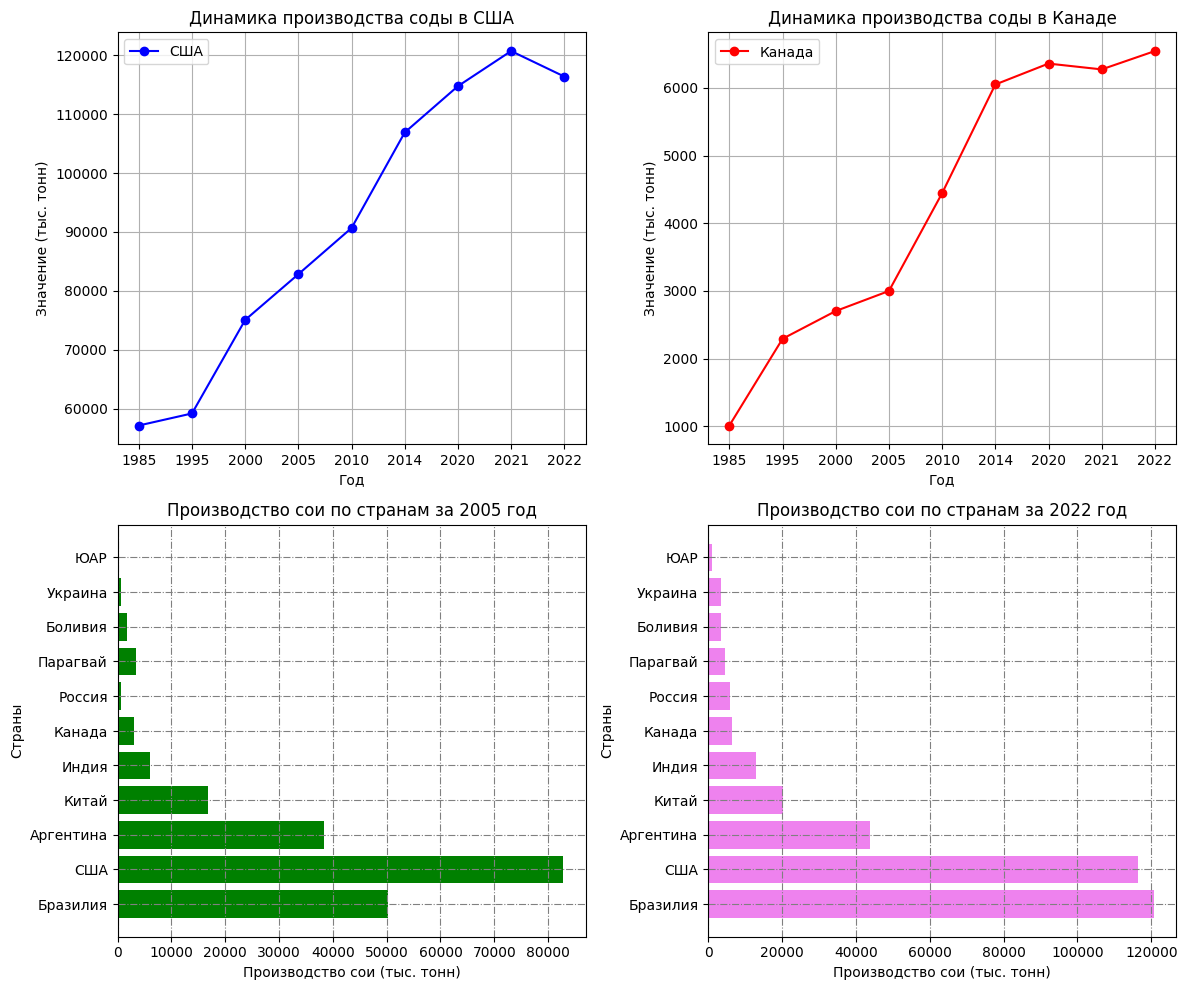

In [ ]:
years = df_1.columns.tolist()
countries = df_1.index.tolist()

# Дата для графиков
data_usa = df_1.loc['США'].tolist()
data_canada = df_1.loc['Канада'].tolist()

data_2005 = df_1['2005'].tolist()
data_2022 = df_1['2022'].tolist()

# Создаем графики
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

# США
axes[0, 0].plot(years, data_usa, marker = 'o', color = 'blue', label = 'США')
axes[0, 0].set_title("Динамика производства соды в США")
axes[0, 0].set_xlabel("Год")
axes[0, 0].set_ylabel("Значение (тыс. тонн)")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Канада
axes[0, 1].plot(years, data_canada, marker = 'o', color = 'red', label = 'Канада')
axes[0, 1].set_title("Динамика производства соды в Канаде")
axes[0, 1].set_xlabel("Год")
axes[0, 1].set_ylabel("Значение (тыс. тонн)")
axes[0, 1].grid(True)
axes[0, 1].legend()

# 2005
axes[1, 0].barh(countries, data_2005, color='green')
axes[1, 0].set_title("Производство сои по странам за 2005 год")
axes[1, 0].set_xlabel("Производство сои (тыс. тонн)")
axes[1, 0].set_ylabel("Страны")
axes[1, 0].grid(color='gray', linestyle='-.')

# 2022
axes[1, 1].barh(countries, data_2022, color='violet')
axes[1, 1].set_title("Производство сои по странам за 2022 год")
axes[1, 1].set_xlabel("Производство сои (тыс. тонн)")
axes[1, 1].set_ylabel("Страны")
axes[1, 1].grid(color='gray', linestyle='-.')

plt.tight_layout()


<font color="violet"> Какие выводы можно сделать из этих графиков? </font>

<font color="violet"> 1) Несложно заметить, что производство сои в 2022 году выросло во всех странах по сравнению с 2005 годом </font>

<font color="violet"> 2) Пятерка лидеров не изменилась: в ней остались Бразилия, США, Аргентина, Китай и Индия, однако США и Бразилия в ней поменялись местами. США были первыми, стали вторыми</font>


<font color="violet"> 3) Из первого графика можем сделать вывод, что производство соды в США за период выросло почти в 2 раза</font>

<font color="violet"> 4) Из второго графика можем сделать вывод, что производство соды в Канаде за период выросло более, чем в 6 раз</font>

<font color="violet"> 5) В целом соотношение количества производимой сои по топу стран поменялось не очень сильно</font>

# Часть 3. Визуализируй графики на картах при помощи plotly - 3 балла.

In [ ]:
import plotly.express as px
import pandas as pd

# Нам нужно, чтобы названия стран были на английском, поработаем с ними и изменим наш датафрейм, подготовив его к созданию графика
data = {
    "Страна": ["Brazil", "USA", "Argentina", "China", "India", "Canada", "Russia",
               "Paraguay", "Bolivia", "Ukraine", "South Africa"],
    "1985": df_1['1985'].tolist(),
    "1995": df_1['1995'].tolist(),
    "2000": df_1['2000'].tolist(),
    "2005": df_1['2005'].tolist(),
    "2010": df_1['2010'].tolist(),
    "2014": df_1['2014'].tolist(),
    "2020": df_1['2020'].tolist(),
    "2021": df_1['2021'].tolist(),
    "2022": df_1['2022'].tolist()
}

df_2 = pd.DataFrame(data)
df_for_graph = df_2.melt(id_vars=["Страна"], var_name="Год", value_name="Производство сои") # Чтобы была анимация

fig = px.choropleth(df_for_graph,
                    locations="Страна",
                    locationmode="country names",
                    color="Производство сои",
                    animation_frame="Год",
                    color_continuous_scale="Bluyl", # Мне эта шкала понравилась
                    title="Динамика производства сои",
                    projection ='natural earth',
                    width=1400,
                    height=700,)

fig.show()


<font color="violet"> Какие выводы можно сделать из этих графиков?  

<font color="violet"> Благодаря этому графику, мы можем заметить, что южноамериканские страны нарастили долю в производстве сои и само производство тоже за эти 25 лет (изначально они были светлыми, потом стали более темными)

<font color="violet"> Еще мы можем видеть, что производство сои сосредоточено в основном в Северной и Южной Америке, а еще в России, Китае и Индии (для последних двух стран это может объясняться большой численностью населения в них)

</font>

# Часть 4. Получи данные о текущей погоде в этих географических точках при помощи Яндекс API - 4 балла.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из части 4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
import requests
import json

api_key = None # API ключ
temperature_dict = {}
headers = {"X-Yandex-API-Key": api_key}

for city, coordinates in city_coordinates.items():
    lat = coordinates['lat'] # Широта
    lon = coordinates['lon'] # Долгота
    url = f"https://api.weather.yandex.ru/v2/forecast?lat={lat}&lon={lon}"
    weather_data = requests.get(url, headers=headers)
    weather_data = weather_data.json() # Получили информацию о погоде
    print(f"{city}:")
    temp = weather_data['fact']['temp']
    temperature_dict[city] = {'Temperature': temp}
    feels_like = weather_data['fact']['feels_like']
    condition = weather_data['fact']['condition']
    wind_speed = weather_data['fact']['wind_speed']
    humidity = weather_data['fact']['humidity']
    pressure_mm = weather_data['fact']['pressure_mm']
    print(f"Temperature: {temp}°C",
          f"Feels like: {feels_like}°C",
          f"Weather condition: {condition}",
          f"Wind speed: {wind_speed} m/s",
          f"Humidity: {humidity}%",
          f"Pressure: {pressure_mm} mmHg",
          sep = '\n')
    print()

# Мне очень понравилось, что можно доставать много данных, поэтому вот много данных по каждому из городов :)
# Создали отдельный словарь temperature_dict с данными по температуре для следующего номера

Бразилиа:
Temperature: 27°C
Feels like: 31°C
Weather condition: partly-cloudy
Wind speed: 4.1 m/s
Humidity: 58%
Pressure: 675 mmHg

Вашингтон:
Temperature: 9°C
Feels like: 3°C
Weather condition: cloudy
Wind speed: 5.1 m/s
Humidity: 54%
Pressure: 754 mmHg

Буэнос-Айрес:
Temperature: 20°C
Feels like: 21°C
Weather condition: rain
Wind speed: 2.6 m/s
Humidity: 87%
Pressure: 762 mmHg

Пекин:
Temperature: 7°C
Feels like: 4°C
Weather condition: clear
Wind speed: 1.7 m/s
Humidity: 64%
Pressure: 764 mmHg

Нью-Дели:
Temperature: 24°C
Feels like: 24°C
Weather condition: clear
Wind speed: 1.1 m/s
Humidity: 48%
Pressure: 738 mmHg

Оттава:
Temperature: -8°C
Feels like: -19°C
Weather condition: overcast
Wind speed: 10.6 m/s
Humidity: 56%
Pressure: 745 mmHg

Москва:
Temperature: 10°C
Feels like: 7°C
Weather condition: clear
Wind speed: 2.6 m/s
Humidity: 60%
Pressure: 749 mmHg

Асунсьон:
Temperature: 35°C
Feels like: 41°C
Weather condition: clear
Wind speed: 2.6 m/s
Humidity: 39%
Pressure: 750 mmHg

Ки

# Часть 5. Визуализируй данные о погоде на картах при помощи plotly - 3 балла.

In [ ]:
try:
   temperature_dict['Сукре'] = temperature_dict.pop('Сукре_(город)')
   city_coordinates['Сукре'] = city_coordinates.pop('Сукре_(город)')
except KeyError:
   pass
# Чтобы отображалось только название этого города

temperature_dict

{'Бразилиа': {'Temperature': 27},
 'Вашингтон': {'Temperature': 9},
 'Буэнос-Айрес': {'Temperature': 20},
 'Пекин': {'Temperature': 7},
 'Нью-Дели': {'Temperature': 24},
 'Оттава': {'Temperature': -8},
 'Москва': {'Temperature': 10},
 'Асунсьон': {'Temperature': 35},
 'Киев': {'Temperature': 16},
 'Претория': {'Temperature': 28},
 'Сукре': {'Temperature': 18}}

In [ ]:
import plotly.express as px
import pandas as pd

data = {
    'City': [],
    'temp': [],
    'lat': [],
    'lon': []
}

for city, temp_data in temperature_dict.items():
    data['City'].append(city)
    data['temp'].append(temp_data['Temperature'])
    data['lat'].append(float(city_coordinates[city]['lat']))
    data['lon'].append(float(city_coordinates[city]['lon']))

df_3 = pd.DataFrame(data)
# подготовили датафрейм для создания графика

fig = px.scatter_geo(df_3,
                     lat='lat',
                     lon='lon',
                     text='City',
                     size=[float(0.25)]*11,
                     color='temp',
                     color_continuous_scale=px.colors.sequential.Pinkyl,
                     title='Температура в городах мира',
                     width=1200,
                     height=700,
                     projection='natural earth'
                     )

fig.show()
